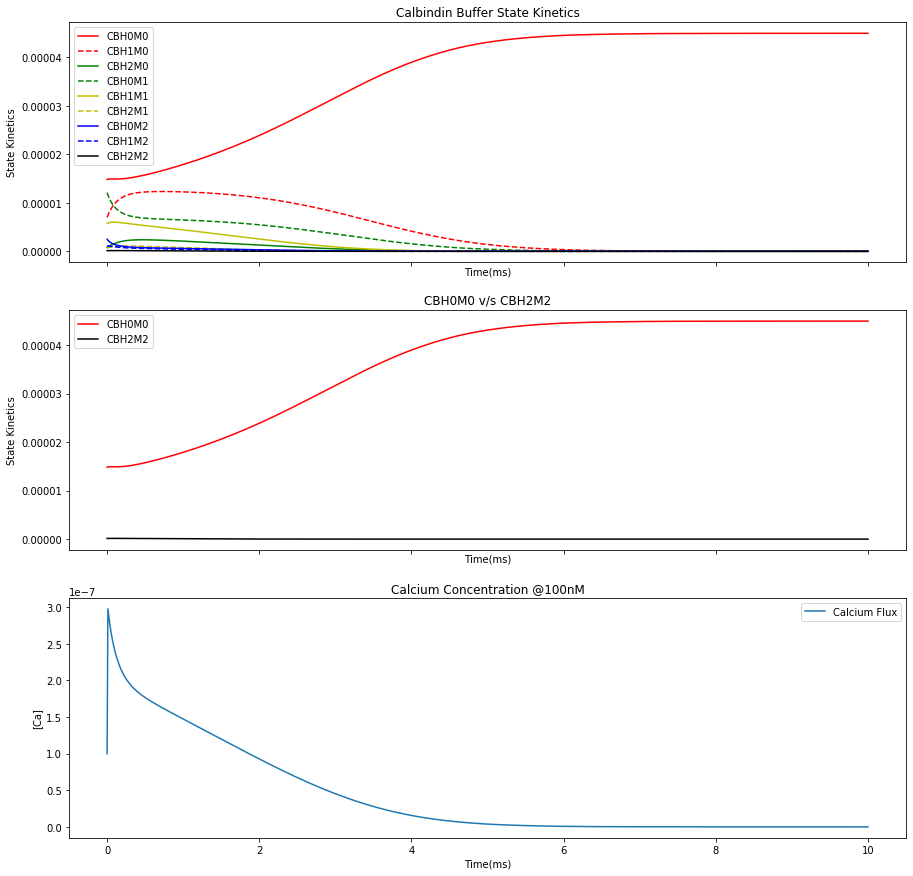

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Defining Calbindin kinetics
kh_plus = 0.55e07    #M-1s-1
kh_minus = 2.6       #s-1
km_plus = 4.35e07    #M-1s-1
km_minus = 35.8      #s-1

#Defining the model
def model1(y,t):
    dy = np.zeros((10,))
    H0M0 = y[0]
    H1M0 = y[1]
    H2M0 = y[2]
    H0M1 = y[3]
    H1M1 = y[4]
    H2M1 = y[5]
    H0M2 = y[6]
    H1M2 = y[7]
    H2M2 = y[8]
    Ca = y[9]
    
    dy[0] = (kh_minus*H1M0)+(km_minus*H0M1)-(2*kh_plus+2*km_plus)*Ca*H0M0
    dy[1] = (2*kh_plus*Ca*H0M0)+(km_minus*H1M1)+(2*kh_minus*H2M0)-(kh_minus+2*km_plus*Ca+kh_plus*Ca)*H1M0
    dy[2] = (kh_plus*Ca*H1M0)+(km_minus*H2M1)-(2*kh_minus+2*km_plus*Ca)*H2M0
    dy[3] = (2*km_plus*Ca*H0M0)+(kh_minus*H1M1)+(2*km_minus*H0M2)-(km_minus+2*kh_plus*Ca+km_plus*Ca)*H0M1
    dy[4] = (2*kh_plus*Ca*H0M1)+(2*km_plus*Ca*H1M0)+(2*kh_minus*H2M1)+(2*km_minus*H1M2)-(kh_minus+km_minus+kh_plus*Ca+km_plus*Ca)*H1M1
    dy[5] = (kh_plus*Ca*H1M1)+(2*km_plus*Ca*H2M0)+(2*km_minus*H2M2)-(2*kh_minus+km_minus+km_plus*Ca)*H2M1
    dy[6] = (km_plus*Ca*H0M1)+(kh_minus*H1M2)-(2*km_minus+2*kh_plus*Ca)*H0M2
    dy[7] = (2*kh_plus*Ca*H0M2)+(km_plus*Ca*H1M1)+(2*kh_minus*H2M2)-(kh_minus+2*km_minus+kh_plus*Ca)*H1M2
    dy[8] = (kh_plus*Ca*H1M2)+(km_plus*Ca*H2M1)-(2*kh_minus+2*km_minus)*H2M2
    dy[9] = (km_minus*(H2M1+H1M1+H0M1+2*(H2M2+H1M2+H0M2)))+(kh_minus*(H2M1+H1M1+H0M1+2*(H2M2+H2M1+H2M0)))-(km_plus*(H2M1+H1M1+H0M1+2*(H2M0+H1M0+H0M0))+kh_plus*(H2M1+H1M1+H0M1+2*(H0M2+H0M1+H0M0)))*Ca
    return dy

#Initialising
y01 = [1.48e-05,7e-06,8.27e-07,1.21e-05,5.74e-06,6.79e-07,2.49e-06,1.18e-06,1.39e-07,100e-09]
t = np.arange(0.0,10.01,0.01)  #time range
sol1 = odeint(model1,y01,t)     #solving the model

#plotting
fig, ax = plt.subplots(3,figsize=(15,15),sharex=True)

ax[0].plot(t,sol1[:,0],'r',label="CBH0M0")
ax[0].plot(t,sol1[:,1],'r--',label="CBH1M0")
ax[0].plot(t,sol1[:,2],'g',label="CBH2M0")
ax[0].plot(t,sol1[:,3],'g--',label="CBH0M1")
ax[0].plot(t,sol1[:,4],'y',label="CBH1M1")
ax[0].plot(t,sol1[:,5],'y--',label="CBH2M1")
ax[0].plot(t,sol1[:,6],'b',label="CBH0M2")
ax[0].plot(t,sol1[:,7],'b--',label="CBH1M2")
ax[0].plot(t,sol1[:,8],'k',label="CBH2M2")
ax[0].set_xlabel("Time(ms)")
ax[0].set_ylabel("State Kinetics")
ax[0].set_title("Calbindin Buffer State Kinetics")
ax[0].legend()

ax[1].plot(t,sol1[:,0],'r',label="CBH0M0")
ax[1].plot(t,sol1[:,8],'k',label="CBH2M2")
ax[1].set_xlabel("Time(ms)")
ax[1].set_ylabel("State Kinetics")
ax[1].set_title("CBH0M0 v/s CBH2M2")
ax[1].legend()

ax[2].plot(t,sol1[:,9],label="Calcium Flux")
ax[2].set_xlabel("Time(ms)")
ax[2].set_ylabel("[Ca]")
ax[2].set_title("Calcium Concentration @100nM")
ax[2].legend()
plt.show()

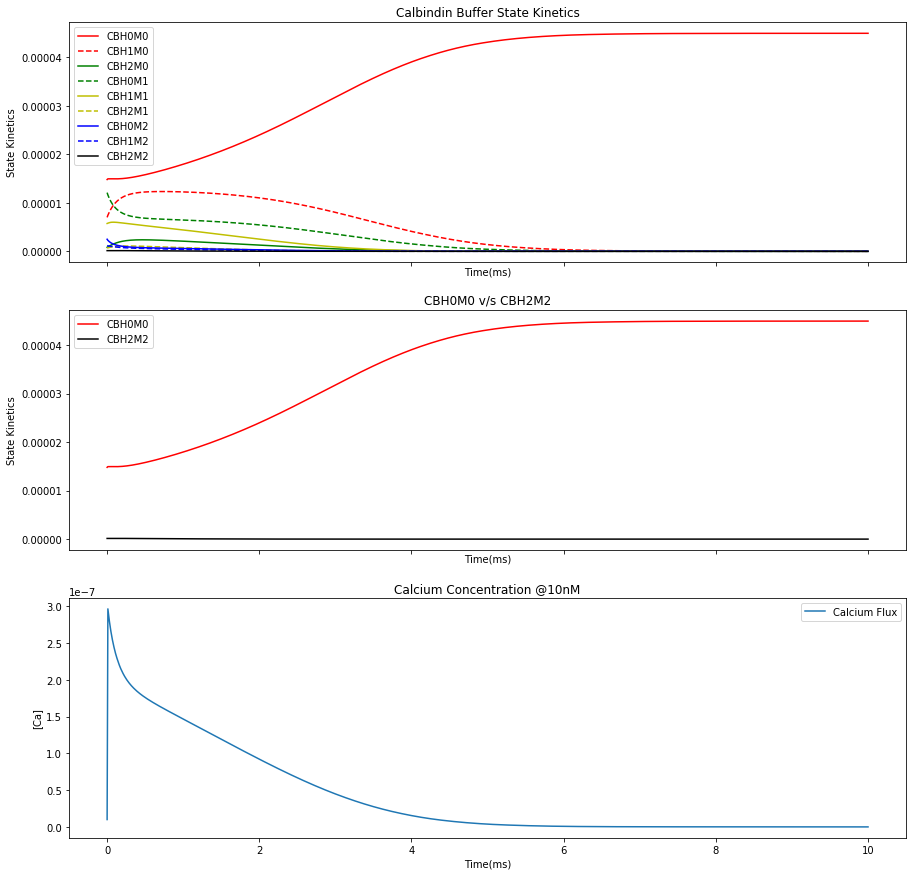

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Defining Calbindin kinetics
kh_plus = 0.55e07    #M-1s-1
kh_minus = 2.6       #s-1
km_plus = 4.35e07    #M-1s-1
km_minus = 35.8      #s-1

#Defining the model
def model2(y,t):
    dy = np.zeros((10,))
    H0M0 = y[0]
    H1M0 = y[1]
    H2M0 = y[2]
    H0M1 = y[3]
    H1M1 = y[4]
    H2M1 = y[5]
    H0M2 = y[6]
    H1M2 = y[7]
    H2M2 = y[8]
    Ca = y[9]
    
    dy[0] = (kh_minus*H1M0)+(km_minus*H0M1)-(2*kh_plus+2*km_plus)*Ca*H0M0
    dy[1] = (2*kh_plus*Ca*H0M0)+(km_minus*H1M1)+(2*kh_minus*H2M0)-(kh_minus+2*km_plus*Ca+kh_plus*Ca)*H1M0
    dy[2] = (kh_plus*Ca*H1M0)+(km_minus*H2M1)-(2*kh_minus+2*km_plus*Ca)*H2M0
    dy[3] = (2*km_plus*Ca*H0M0)+(kh_minus*H1M1)+(2*km_minus*H0M2)-(km_minus+2*kh_plus*Ca+km_plus*Ca)*H0M1
    dy[4] = (2*kh_plus*Ca*H0M1)+(2*km_plus*Ca*H1M0)+(2*kh_minus*H2M1)+(2*km_minus*H1M2)-(kh_minus+km_minus+kh_plus*Ca+km_plus*Ca)*H1M1
    dy[5] = (kh_plus*Ca*H1M1)+(2*km_plus*Ca*H2M0)+(2*km_minus*H2M2)-(2*kh_minus+km_minus+km_plus*Ca)*H2M1
    dy[6] = (km_plus*Ca*H0M1)+(kh_minus*H1M2)-(2*km_minus+2*kh_plus*Ca)*H0M2
    dy[7] = (2*kh_plus*Ca*H0M2)+(km_plus*Ca*H1M1)+(2*kh_minus*H2M2)-(kh_minus+2*km_minus+kh_plus*Ca)*H1M2
    dy[8] = (kh_plus*Ca*H1M2)+(km_plus*Ca*H2M1)-(2*kh_minus+2*km_minus)*H2M2
    dy[9] = (km_minus*(H2M1+H1M1+H0M1+2*(H2M2+H1M2+H0M2)))+(kh_minus*(H2M1+H1M1+H0M1+2*(H2M2+H2M1+H2M0)))-(km_plus*(H2M1+H1M1+H0M1+2*(H2M0+H1M0+H0M0))+kh_plus*(H2M1+H1M1+H0M1+2*(H0M2+H0M1+H0M0)))*Ca
    return dy

#Initialising
y02 = [1.48e-05,7e-06,8.27e-07,1.21e-05,5.74e-06,6.79e-07,2.49e-06,1.18e-06,1.39e-07,10e-09]
t = np.arange(0.0,10.01,0.01)  #time range
sol2 = odeint(model2,y02,t)     #solving the model

#plotting
fig, ax = plt.subplots(3,figsize=(15,15),sharex=True)

ax[0].plot(t,sol2[:,0],'r',label="CBH0M0")
ax[0].plot(t,sol2[:,1],'r--',label="CBH1M0")
ax[0].plot(t,sol2[:,2],'g',label="CBH2M0")
ax[0].plot(t,sol2[:,3],'g--',label="CBH0M1")
ax[0].plot(t,sol2[:,4],'y',label="CBH1M1")
ax[0].plot(t,sol2[:,5],'y--',label="CBH2M1")
ax[0].plot(t,sol2[:,6],'b',label="CBH0M2")
ax[0].plot(t,sol2[:,7],'b--',label="CBH1M2")
ax[0].plot(t,sol2[:,8],'k',label="CBH2M2")
ax[0].set_xlabel("Time(ms)")
ax[0].set_ylabel("State Kinetics")
ax[0].set_title("Calbindin Buffer State Kinetics")
ax[0].legend()

ax[1].plot(t,sol2[:,0],'r',label="CBH0M0")
ax[1].plot(t,sol2[:,8],'k',label="CBH2M2")
ax[1].set_xlabel("Time(ms)")
ax[1].set_ylabel("State Kinetics")
ax[1].set_title("CBH0M0 v/s CBH2M2")
ax[1].legend()

ax[2].plot(t,sol2[:,9],label="Calcium Flux")
ax[2].set_xlabel("Time(ms)")
ax[2].set_ylabel("[Ca]")
ax[2].set_title("Calcium Concentration @10nM")
ax[2].legend()
plt.show()

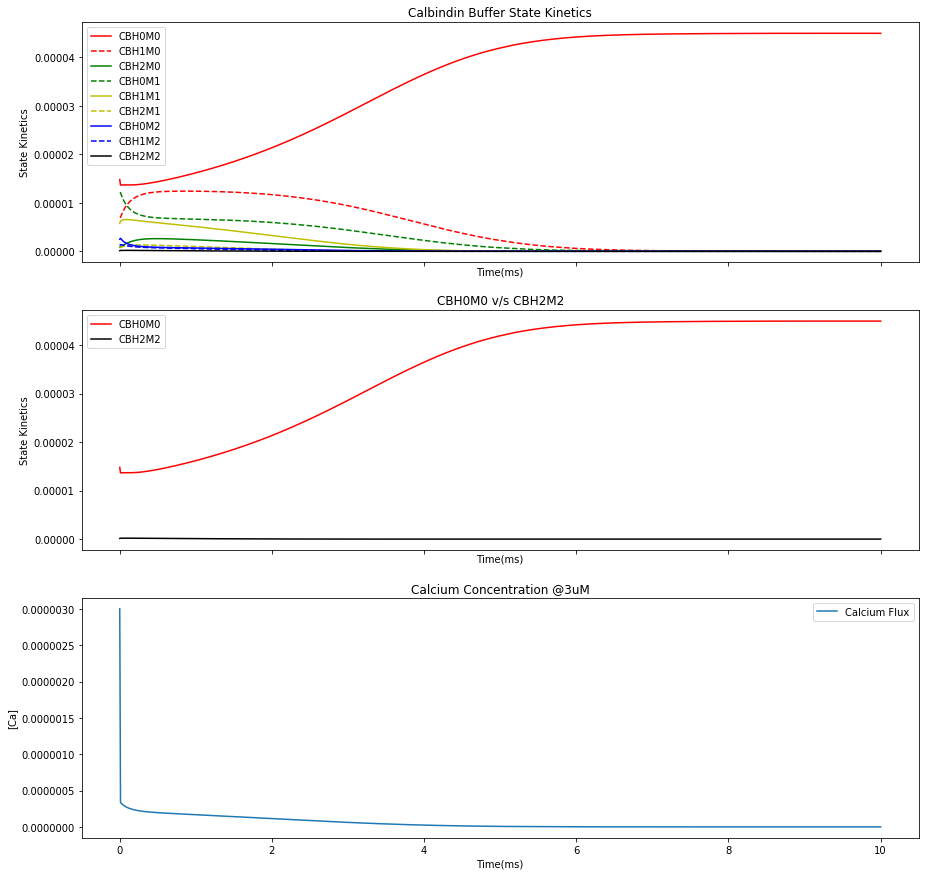

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Defining Calbindin kinetics
kh_plus = 0.55e07    #M-1s-1
kh_minus = 2.6       #s-1
km_plus = 4.35e07    #M-1s-1
km_minus = 35.8      #s-1

#Defining the model
def model3(y,t):
    dy = np.zeros((10,))
    H0M0 = y[0]
    H1M0 = y[1]
    H2M0 = y[2]
    H0M1 = y[3]
    H1M1 = y[4]
    H2M1 = y[5]
    H0M2 = y[6]
    H1M2 = y[7]
    H2M2 = y[8]
    Ca = y[9]
    
    dy[0] = (kh_minus*H1M0)+(km_minus*H0M1)-(2*kh_plus+2*km_plus)*Ca*H0M0
    dy[1] = (2*kh_plus*Ca*H0M0)+(km_minus*H1M1)+(2*kh_minus*H2M0)-(kh_minus+2*km_plus*Ca+kh_plus*Ca)*H1M0
    dy[2] = (kh_plus*Ca*H1M0)+(km_minus*H2M1)-(2*kh_minus+2*km_plus*Ca)*H2M0
    dy[3] = (2*km_plus*Ca*H0M0)+(kh_minus*H1M1)+(2*km_minus*H0M2)-(km_minus+2*kh_plus*Ca+km_plus*Ca)*H0M1
    dy[4] = (2*kh_plus*Ca*H0M1)+(2*km_plus*Ca*H1M0)+(2*kh_minus*H2M1)+(2*km_minus*H1M2)-(kh_minus+km_minus+kh_plus*Ca+km_plus*Ca)*H1M1
    dy[5] = (kh_plus*Ca*H1M1)+(2*km_plus*Ca*H2M0)+(2*km_minus*H2M2)-(2*kh_minus+km_minus+km_plus*Ca)*H2M1
    dy[6] = (km_plus*Ca*H0M1)+(kh_minus*H1M2)-(2*km_minus+2*kh_plus*Ca)*H0M2
    dy[7] = (2*kh_plus*Ca*H0M2)+(km_plus*Ca*H1M1)+(2*kh_minus*H2M2)-(kh_minus+2*km_minus+kh_plus*Ca)*H1M2
    dy[8] = (kh_plus*Ca*H1M2)+(km_plus*Ca*H2M1)-(2*kh_minus+2*km_minus)*H2M2
    dy[9] = (km_minus*(H2M1+H1M1+H0M1+2*(H2M2+H1M2+H0M2)))+(kh_minus*(H2M1+H1M1+H0M1+2*(H2M2+H2M1+H2M0)))-(km_plus*(H2M1+H1M1+H0M1+2*(H2M0+H1M0+H0M0))+kh_plus*(H2M1+H1M1+H0M1+2*(H0M2+H0M1+H0M0)))*Ca
    return dy

#Initialising
y03 = [1.48e-05,7e-06,8.27e-07,1.21e-05,5.74e-06,6.79e-07,2.49e-06,1.18e-06,1.39e-07,3e-6]
t = np.arange(0.0,10.01,0.01)  #time range
sol3 = odeint(model3,y03,t)     #solving the model

#plotting
fig, ax = plt.subplots(3,figsize=(15,15),sharex=True)

ax[0].plot(t,sol3[:,0],'r',label="CBH0M0")
ax[0].plot(t,sol3[:,1],'r--',label="CBH1M0")
ax[0].plot(t,sol3[:,2],'g',label="CBH2M0")
ax[0].plot(t,sol3[:,3],'g--',label="CBH0M1")
ax[0].plot(t,sol3[:,4],'y',label="CBH1M1")
ax[0].plot(t,sol3[:,5],'y--',label="CBH2M1")
ax[0].plot(t,sol3[:,6],'b',label="CBH0M2")
ax[0].plot(t,sol3[:,7],'b--',label="CBH1M2")
ax[0].plot(t,sol3[:,8],'k',label="CBH2M2")
ax[0].set_xlabel("Time(ms)")
ax[0].set_ylabel("State Kinetics")
ax[0].set_title("Calbindin Buffer State Kinetics")
ax[0].legend()

ax[1].plot(t,sol3[:,0],'r',label="CBH0M0")
ax[1].plot(t,sol3[:,8],'k',label="CBH2M2")
ax[1].set_xlabel("Time(ms)")
ax[1].set_ylabel("State Kinetics")
ax[1].set_title("CBH0M0 v/s CBH2M2")
ax[1].legend()

ax[2].plot(t,sol3[:,9],label="Calcium Flux")
ax[2].set_xlabel("Time(ms)")
ax[2].set_ylabel("[Ca]")
ax[2].set_title("Calcium Concentration @3uM")
ax[2].legend()
plt.show()

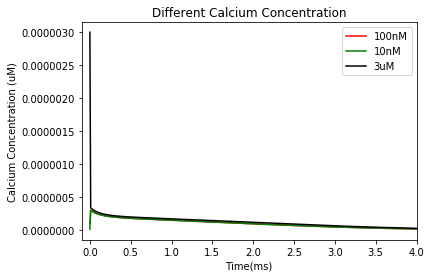

In [21]:
plt.plot(t,sol1[:,9],'r',label="100nM")
plt.plot(t,sol2[:,9],'g',label="10nM")
plt.plot(t,sol3[:,9],'k',label="3uM")
plt.xlabel("Time(ms)")
plt.ylabel("Calcium Concentration (uM)")
plt.title("Different Calcium Concentration")
plt.legend()
plt.xlim(-0.1,4)
plt.show()